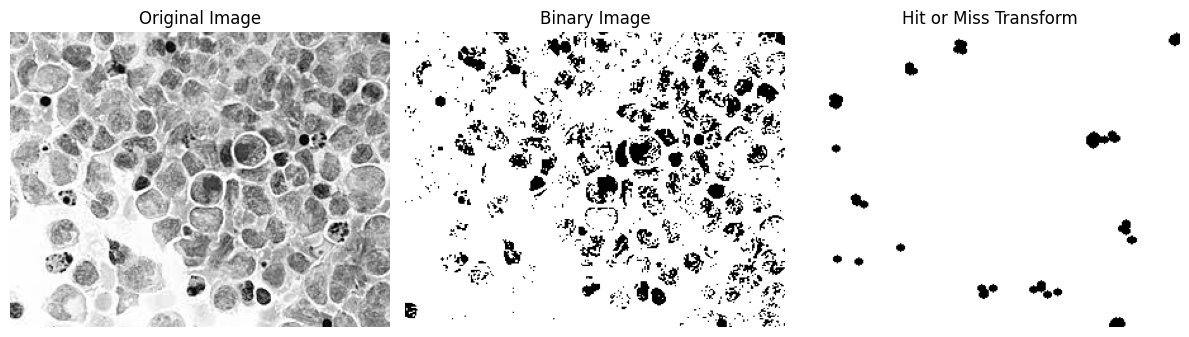

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import binary_erosion, binary_dilation


img = cv2.imread('cancer.jpg', cv2.IMREAD_GRAYSCALE)
_, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

kernel1 = cv2.getStructuringElement( cv2.MORPH_ELLIPSE, (5,5))
kernel2 = cv2.getStructuringElement( cv2.MORPH_ELLIPSE, (7,7))

eroded1 = binary_erosion(img, kernel1)

eroded2 = binary_erosion(img, kernel2)

hit_or_miss_result = eroded1 & eroded2


plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_bin, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(hit_or_miss_result, cmap='gray')
plt.title('Hit or Miss Transform')
plt.axis('off')

plt.tight_layout()
plt.show()


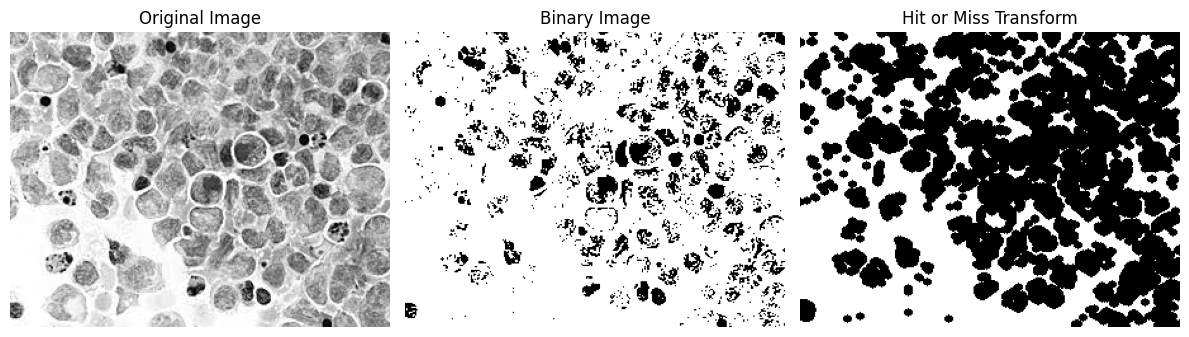

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
img = cv2.imread('cancer.jpg', cv2.IMREAD_GRAYSCALE)

# Binarizar la imagen
_, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Definir los kernels para la erosión
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

# Aplicar erosión con los dos kernels
eroded1 = cv2.erode(img_bin, kernel1)
eroded2 = cv2.erode(img_bin, kernel2)

# Operación hit-or-miss
hit_or_miss_result = cv2.bitwise_and(eroded1, eroded2)

# Mostrar los resultados
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_bin, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(hit_or_miss_result, cmap='gray')
plt.title('Hit or Miss Transform')
plt.axis('off')

plt.tight_layout()
plt.show()


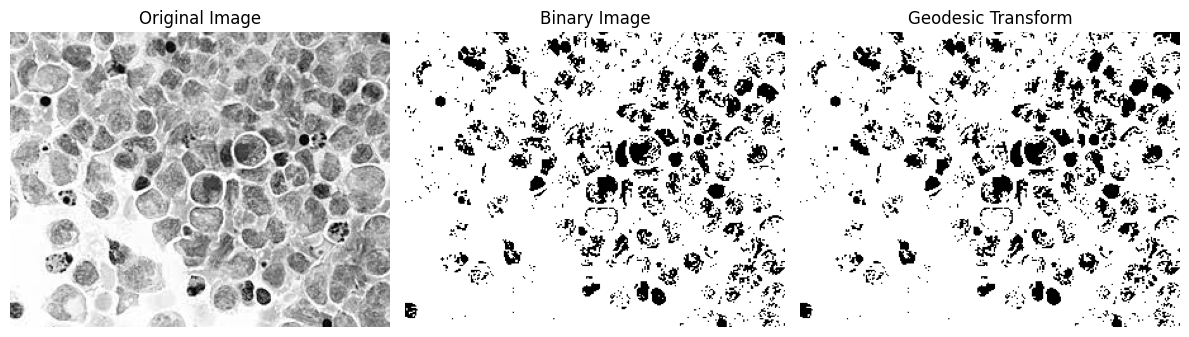

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology, img_as_ubyte
from skimage.morphology import reconstruction

img = cv2.imread('cancer.jpg', cv2.IMREAD_GRAYSCALE)

_, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
marker = cv2.erode(img_bin, kernel, iterations=2)

marker = img_as_ubyte(marker) 
img_bin = img_as_ubyte(img_bin)  
reconstructed = reconstruction(marker, img_bin, method='dilation')

reconstructed_bin = reconstructed > 0.5

# Mostrar los resultados
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_bin, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_bin, cmap='gray')
plt.title('Geodesic Transform')
plt.axis('off')

plt.tight_layout()
plt.show()


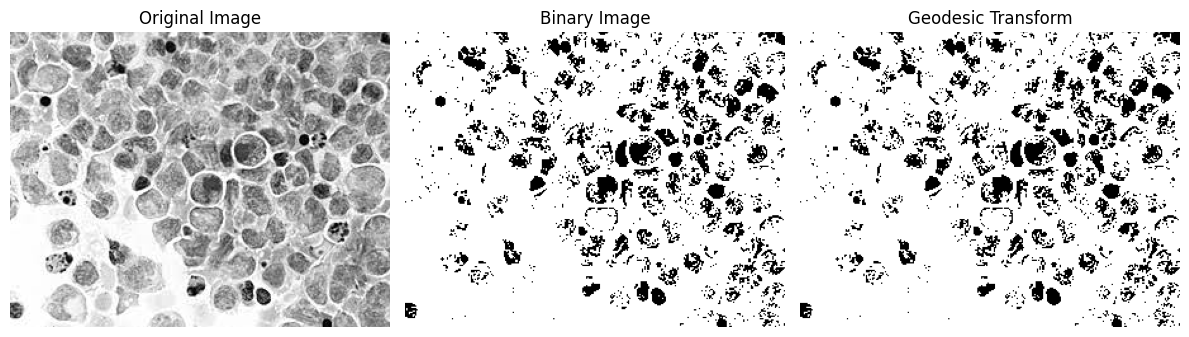

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('cancer.jpg', cv2.IMREAD_GRAYSCALE)

_, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)


kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
marker = cv2.erode(img_bin, kernel, iterations=2)

while True:
    dilated_marker = cv2.dilate(marker, kernel)
    new_marker = np.minimum(dilated_marker, img_bin)
    if np.array_equal(new_marker, marker):
        break
    marker = new_marker

geodesic_transform = marker

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_bin, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(geodesic_transform, cmap='gray')
plt.title('Geodesic Transform')
plt.axis('off')

plt.tight_layout()
plt.show()


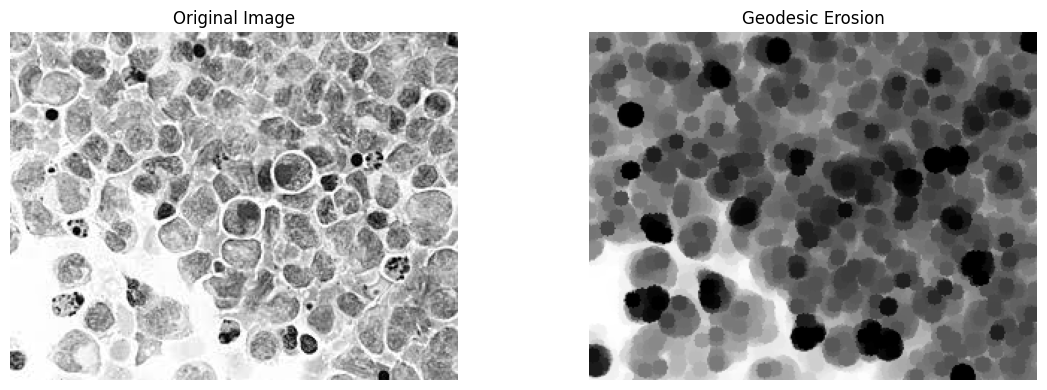

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte, morphology

img = cv2.imread('cancer.jpg', cv2.IMREAD_GRAYSCALE)

marker = morphology.erosion(img, morphology.disk(5))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(marker, cmap='gray')
plt.title('Geodesic Erosion')
plt.axis('off')

plt.tight_layout()
plt.show()


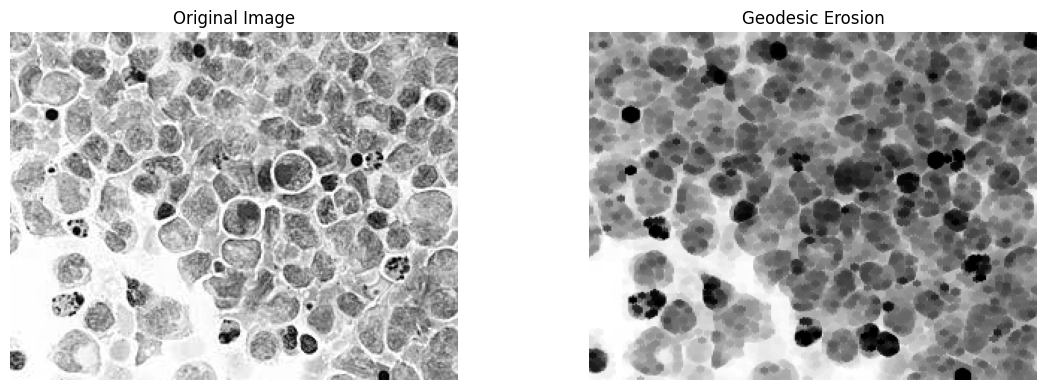

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('cancer.jpg', cv2.IMREAD_GRAYSCALE)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

marker = cv2.erode(img, kernel, iterations=1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(marker, cmap='gray')
plt.title('Geodesic Erosion')
plt.axis('off')

plt.tight_layout()
plt.show()


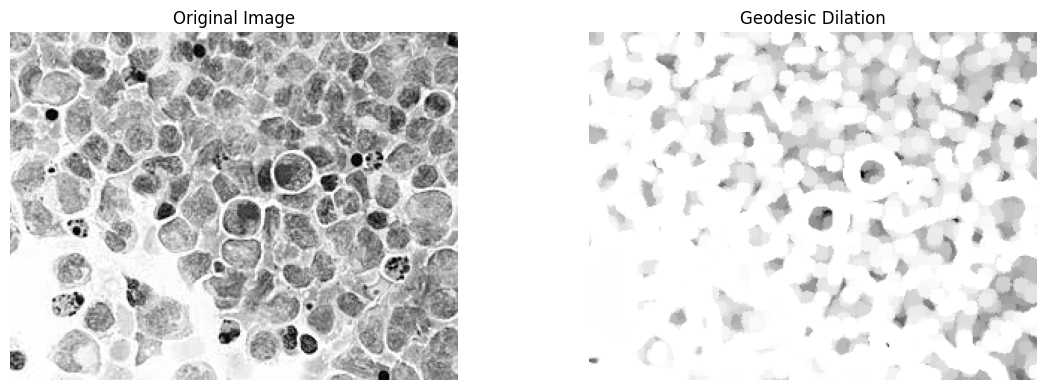

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte, morphology

img = cv2.imread('cancer.jpg', cv2.IMREAD_GRAYSCALE)

size = 5

reconstructed = morphology.dilation(img, morphology.disk(size))

# Mostrar los resultados
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed, cmap='gray')
plt.title('Geodesic Dilation')
plt.axis('off')

plt.tight_layout()
plt.show()


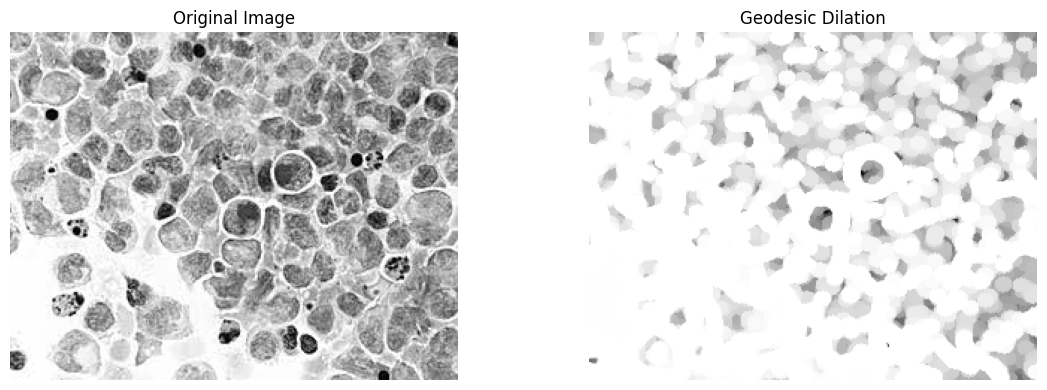

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen en escala de grises
img = cv2.imread('cancer.jpg', cv2.IMREAD_GRAYSCALE)

# Definir el tamaño del elemento estructurante
size = 5

# Crear el elemento estructurante
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size*2 + 1, size*2 + 1))

# Aplicar la dilatación
reconstructed = cv2.dilate(img, element)

# Mostrar los resultados
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed, cmap='gray')
plt.title('Geodesic Dilation')
plt.axis('off')

plt.tight_layout()
plt.show()
